# Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Generating synthetic data
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=42)


In [15]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.8800

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88        50
           1       0.85      0.92      0.88        50

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100


Confusion Matrix:
 [[42  8]
 [ 4 46]]


(1000, 5)


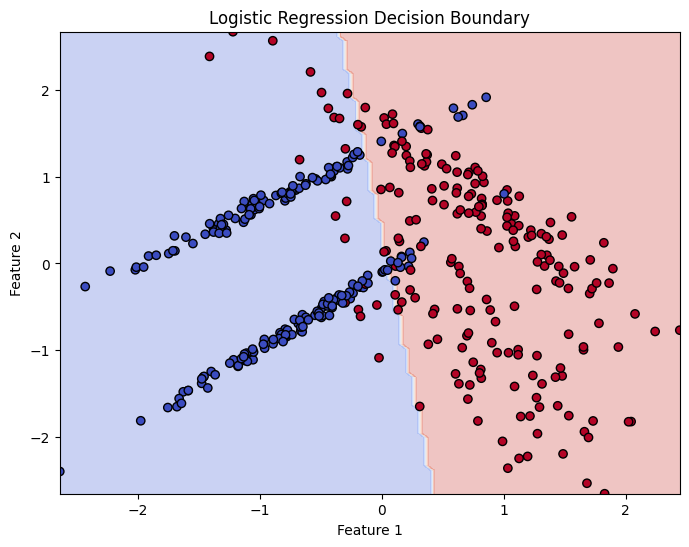

In [18]:
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))


Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolors="k")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.show()